<a href="https://colab.research.google.com/github/Anuj-1996/Ship_CO2_Emission/blob/main/EDA_of_EU_CO2_emissions_from_maritime_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.
pycaret 2.3.10 requires scipy<=1.5.4, but you have scipy 1.7.3 which is incompatible.


# **EDA of CO2 emissions from maritime transport (Europe)**

For this EDA, the dataset has downloaded from the EU MRV website : https://mrv.emsa.europa.eu/#public/emission-report.

The EU MRV (Monitoring, Reporting, Verification) Regulation entered into force on 1 July 2015, and requires ship owners and operators to annually monitor, report and verify CO2 emissions for vessels larger than 5000 gross tonnage (GT) calling at any EU and EFTA (Norway and Iceland) port.

# Preliminary Dataset

Year wise dataset available on the EU MRV website from 2018 to 2021 in the Excel format. The year-wise dataset downloaded on local drive and merge on the Excel. Also, deleted unnecessory/empty column from the dataset.

In [ ]:
#Mounting Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [96]:
#importing libraries
import pandas as pd
import numpy as np

#Chi-Suquare test
import scipy.stats as stats

#visualization Libraries: Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn
import seaborn as sns
sns.set()

#plotly go and px
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.io as pio

pio.renderers

pio.renderers.default = "svg"

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [71]:
# Importing Excel from the drive and converting csv to pandas df
dataset = pd.read_excel('/content/drive/MyDrive/EU_CO2_Emission_Data/2018_2021_EU_ship_emission.xlsx')

In [72]:
#creating copy of main dataset
df = dataset.copy()

In [73]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_')

In [74]:
# Displaying 1st five rows
df.head(5)

,IMO_Number,Name,Ship_type,Reporting_Period,Technical_efficiency,[gCO₂/t·nm],Ice_Class,Verifier_Country,A,B,...,Fuel_consumption_per_transport_workvolume)_on_laden_voyages_[g_/_m³_·_n_miles],Fuel_consumption_per_transport_workdwt)_on_laden_voyages_[g_/_dwt_carried_·_n_miles],Fuel_consumption_per_transport_workpax)_on_laden_voyages_[g_/_pax_·_n_miles],Fuel_consumption_per_transport_workfreight)_on_laden_voyages_[g_/_m_tonnes_·_n_miles],CO₂_emissions_per_distance_on_laden_voyages_[kg_CO₂_/_n_mile],CO₂_emissions_per_transport_workmass)_on_laden_voyages_[g_CO₂_/_m_tonnes_·_n_miles],CO₂_emissions_per_transport_workvolume)_on_laden_voyages_[g_CO₂_/_m³_·_n_miles],CO₂_emissions_per_transport_workdwt)_on_laden_voyages_[g_CO₂_/_dwt_carried_·_n_miles],CO₂_emissions_per_transport_workpax)_on_laden_voyages_[g_CO₂_/_pax_·_n_miles],CO₂_emissions_per_transport_workfreight)_on_laden_voyages_[g_CO₂_/_m_tonnes_·_n_miles]
0,6703343,EQUALITY,Other ship types,2021.0,EIV,57.84,NaN,Greece,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7037806,IONIAN STAR,Ro-pax ship,2021.0,EIV,19.40,NaN,France,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7043843,TALOS,Ro-ro ship,2021.0,EIV,48.71,NaN,France,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7128332,SEA WIND,Ro-pax ship,2021.0,EIV,9.29,IB,France,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7226952,FJARDVAGEN,Ro-ro ship,2021.0,EIV,43.00,IA,France,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Overview

In [75]:
#shape of the Dataset
print('\n Shape:',df.shape)


 Shape: (48848, 50)


In [76]:
#Column or Feature in the dataset
print("\nNumber of features:", df.shape[1])
print("\nFeatures:")
print(df.columns.tolist())


Number of features: 50

Features:
['IMO_Number', 'Name', 'Ship_type', 'Reporting_Period', 'Technical_efficiency', '[gCO₂/t·nm]', 'Ice_Class', 'Verifier_Country', 'A', 'B', 'C', 'D', 'Total_fuel_consumption_[m_tonnes]', 'Fuel_consumptions_assigned_to_On_laden_[m_tonnes]', 'Total_CO₂_emissions_[m_tonnes]', 'CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes]', 'CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes]', 'CO₂_emissions_assigned_to_Passenger_transport_[m_tonnes]', 'CO₂_emissions_assigned_to_Freight_transport_[m_tonnes]', 'CO₂_emissions_assigned_to_On_laden_[m_tonnes]', 'Annual_Total_time_spent_at_sea_[hours]', 'Annual_average_Fuel_consumption_per_distance_[kg_/_n_mile]', 'Annual_average_Fuel_consumption_per_transport_workmass)_[g_/_m_tonnes_·_n_mi

In [77]:
#missing value
missing_value = df.isnull().sum().values.sum()

if missing_value == 0:
  print('\n Missing Values: No Missing Values')
else:
  print('\n Missing Values:', missing_value)


 Missing Values: 1420366


In [78]:
#unique value

print("\n Unique values:")
print(df.nunique())



 Unique values:
IMO_Number                                                                                     18265
Name                                                                                           19451
Ship_type                                                                                         15
Reporting_Period                                                                                   4
Technical_efficiency                                                                               2
[gCO₂/t·nm]                                                                                     3061
Ice_Class                                                                                         11
Verifier_Country                                                                                  14
A                                                                                                  1
B                                                                         

In [79]:
#Data Type
print("\n Datatype:")
df.dtypes


 Datatype:


IMO_Number                                                                                       int64
Name                                                                                            object
Ship_type                                                                                       object
Reporting_Period                                                                               float64
Technical_efficiency                                                                            object
[gCO₂/t·nm]                                                                                    float64
Ice_Class                                                                                       object
Verifier_Country                                                                                object
A                                                                                               object
B                                                                        

In [80]:
#Describe
print("\n Statistics:")
df.describe().T


 Statistics:


,count,mean,std,min,25%,50%,75%,max
IMO_Number,48848.0,9.452908e+06,2.872266e+05,5383304.00,9.307798e+06,9451575.000,9.662370e+06,9.924912e+06
Reporting_Period,48848.0,2.019493e+03,1.117787e+00,2018.00,2.018000e+03,2019.000,2.020000e+03,2.021000e+03
[gCO₂/t·nm],44898.0,1.331610e+01,2.406462e+02,0.00,4.500000e+00,7.090,1.448000e+01,4.622200e+04
Total_fuel_consumption_[m_tonnes],48848.0,3.580911e+03,4.535996e+03,0.00,1.046290e+03,2060.890,4.083733e+03,9.846520e+04
Fuel_consumptions_assigned_to_On_laden_[m_tonnes],5835.0,3.074454e+03,4.383853e+03,0.00,7.528650e+02,1452.300,2.990055e+03,4.471546e+04
Total_CO₂_emissions_[m_tonnes],48848.0,1.117477e+04,1.404531e+04,0.00,3.283740e+03,6472.610,1.282207e+04,3.154785e+05
CO₂_emissions_from_all_voyages_between_ports_under_a_MS_jurisdiction_[m_tonnes],48848.0,3.406427e+03,1.166661e+04,0.00,0.000000e+00,562.905,2.477742e+03,1.672576e+06
CO₂_emissions_from_all_voyages_which_departed_from_ports_under_a_MS_jurisdiction_[m_tonnes],48848.0,3.402532e+03,5.086573e+03,0.00,6.963575e+02,1844.540,3.830892e+03,1.706430e+05
CO₂_emissions_from_all_voyages_to_ports_under_a_MS_jurisdiction_[m_tonnes],48848.0,3.720010e+03,5.642987e+03,0.00,8.570825e+02,2111.530,4.200448e+03,3.595340e+05
CO₂_emissions_which_occurred_within_ports_under_a_MS_jurisdiction_at_berth_[m_tonnes],48848.0,7.355515e+02,5.899453e+03,0.00,1.205100e+02,314.600,8.308550e+02,1.260629e+06


In [81]:
#ship types
df.Ship_type.unique()

array(['Other ship types', 'Ro-pax ship', 'Ro-ro ship', 'Bulk carrier',
       'Passenger ship', 'General cargo ship', 'Chemical tanker',
       'Container ship', 'Refrigerated cargo carrier', 'Vehicle carrier',
       'Gas carrier', 'Container/ro-ro cargo ship', 'Oil tanker',
       'Combination carrier', 'LNG carrier'], dtype=object)

# **Dataset as per ship types**

Creating new dataset as per the unique value of the ships.  

In [82]:
#Ro-pax ship
df_ropax = df[df['Ship_type']=='Ro-pax ship']

#Ro-ro ship
df_roro = df[df['Ship_type']=='Ro-ro ship']

#Bulk carrier
df_bulk = df[df['Ship_type']=='Bulk carrier']

#Passenger ship
df_passenger = df[df['Ship_type']=='Passenger ship']

#General cargo ship
df_cargo = df[df['Ship_type']=='General cargo ship']

#Chemical tanker
df_chemical = df[df['Ship_type']=='Chemical tanker']

#Container ship'
df_container =df[df['Ship_type']=='Container ship']

#Refrigerated cargo carrier
df_refcargo = df[df['Ship_type']=='Refrigerated cargo carrier']

#Vehicle carrier
df_vehicle_carrier = df[df['Ship_type']=='Vehicle carrier']

#Gas carrier
df_gas_carrier = df[df['Ship_type']=='Gas carrier']

#Container/ro-ro cargo ship
df_container_roro = df[df['Ship_type']=='Container/ro-ro cargo ship']

#Oil tanker
df_oil = df[df['Ship_type']=='Oil tanker']

#Combination carrier
df_comination = df[df['Ship_type']=='Combination carrier']

#LNG carrier
df_lng = df[df['Ship_type']=='LNG carrier'] 

#Other ship types
df_other = df[df['Ship_type']=='Other ship types']

# 1. EDA

In [83]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [84]:
dtale.show(df)

https://uh1mktvb7f-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/3

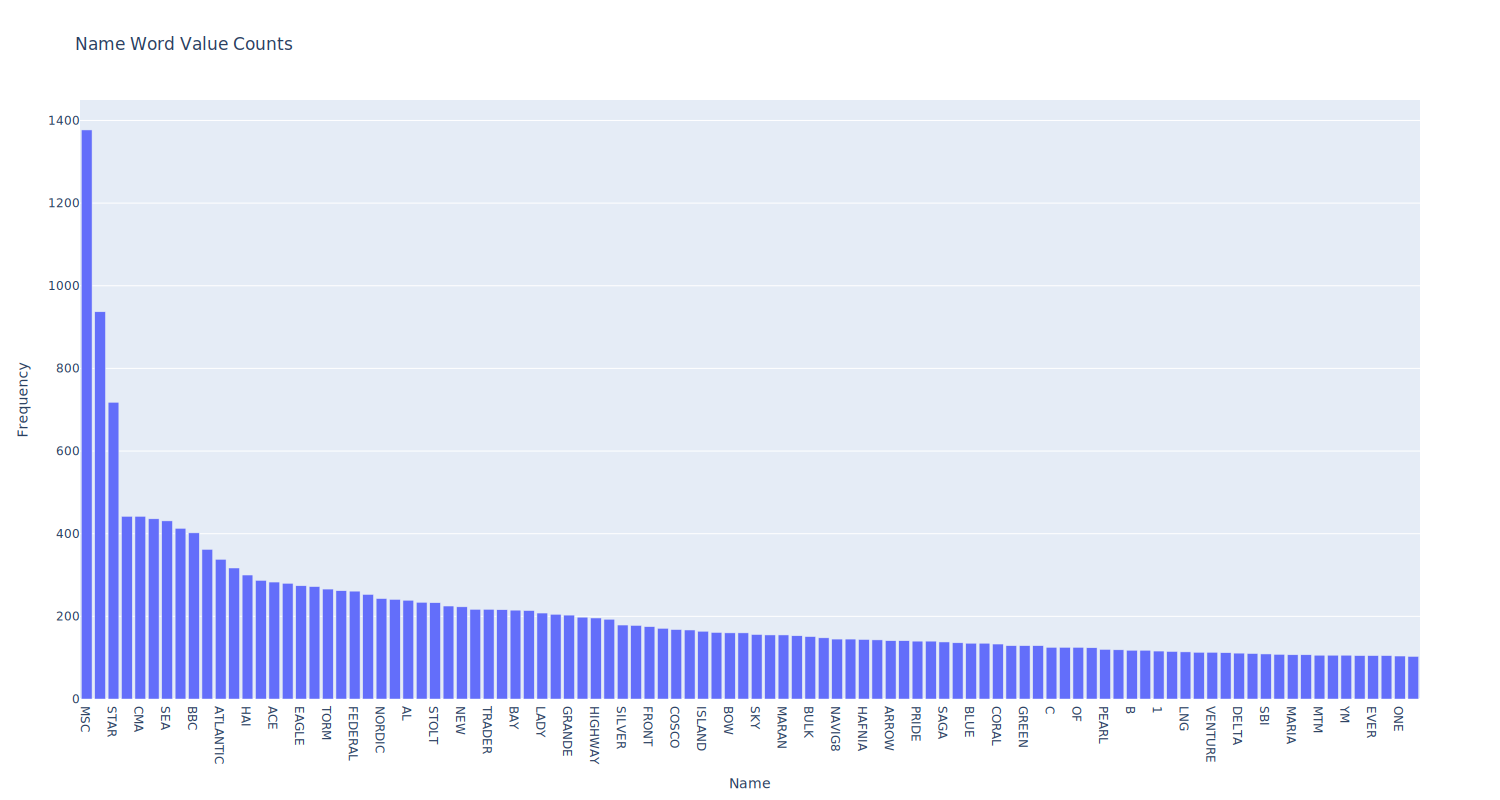

In [107]:
#Word Values Count
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

df = df[[c for c in df.columns if c not in ['IMO_Number']]]
s = df[~pd.isnull(df['Name'])]['Name']
chart = pd.value_counts(s.str.split(expand=True).stack())
chart = chart.to_frame(name='data').sort_index()
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Name Word Value Counts'},
    'xaxis': {'title': {'text': 'Name'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=800, width=1500)
figure.show()


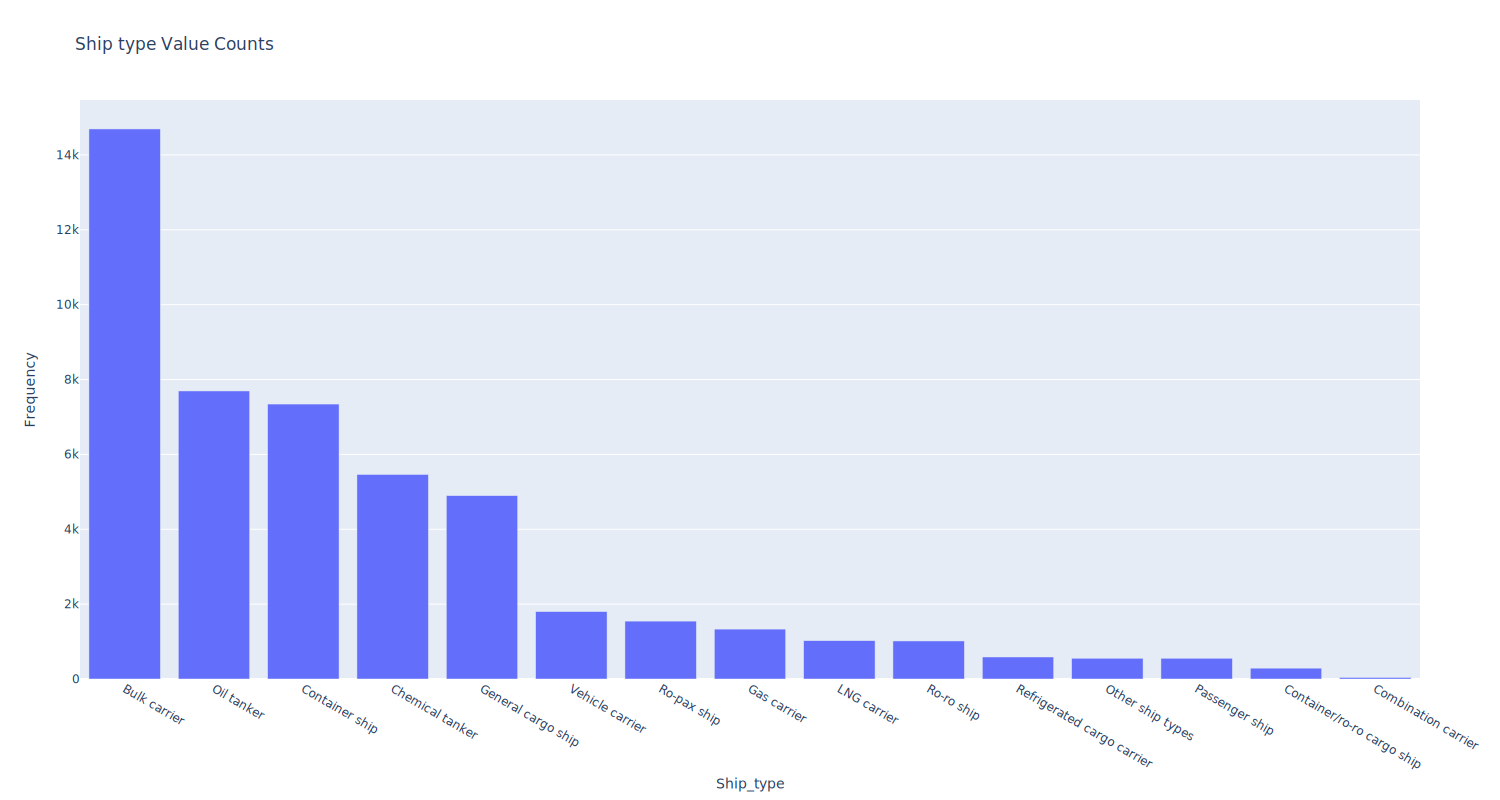

In [108]:
#Ship Type Value Count

s = df[~pd.isnull(df['Ship_type'])]['Ship_type']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Ship type Value Counts'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=800, width=1500)
figure.show()

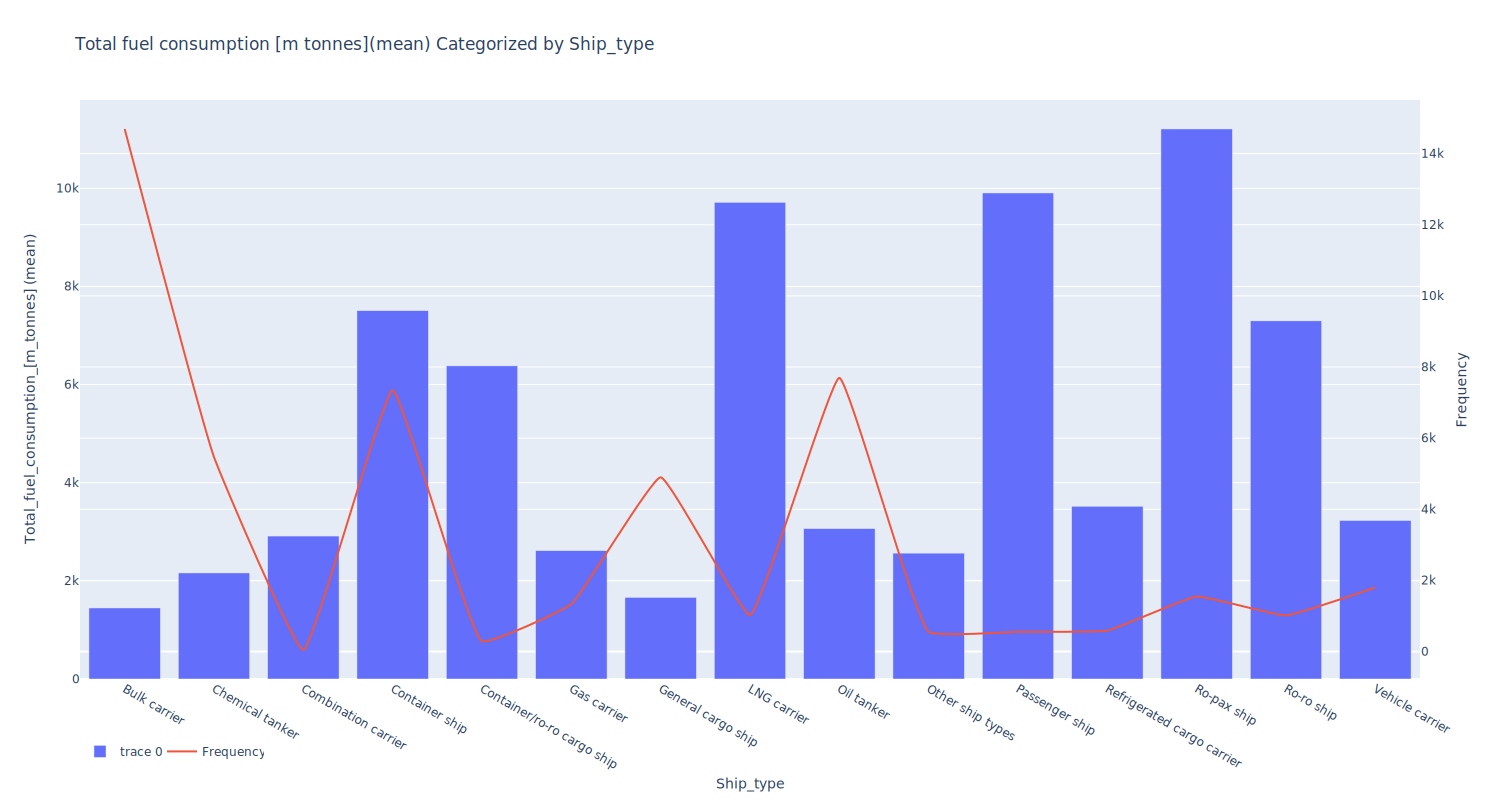

In [109]:
#@title Total fuel consumption (m tonnes)(mean) Categorized by Ship_type


chart = df.groupby('Ship_type')[['Total_fuel_consumption_[m_tonnes]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Total fuel consumption [m tonnes](mean) Categorized by Ship_type'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'side': 'left', 'title': {'text': 'Total_fuel_consumption_[m_tonnes] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=800, width=1500)
figure.show()

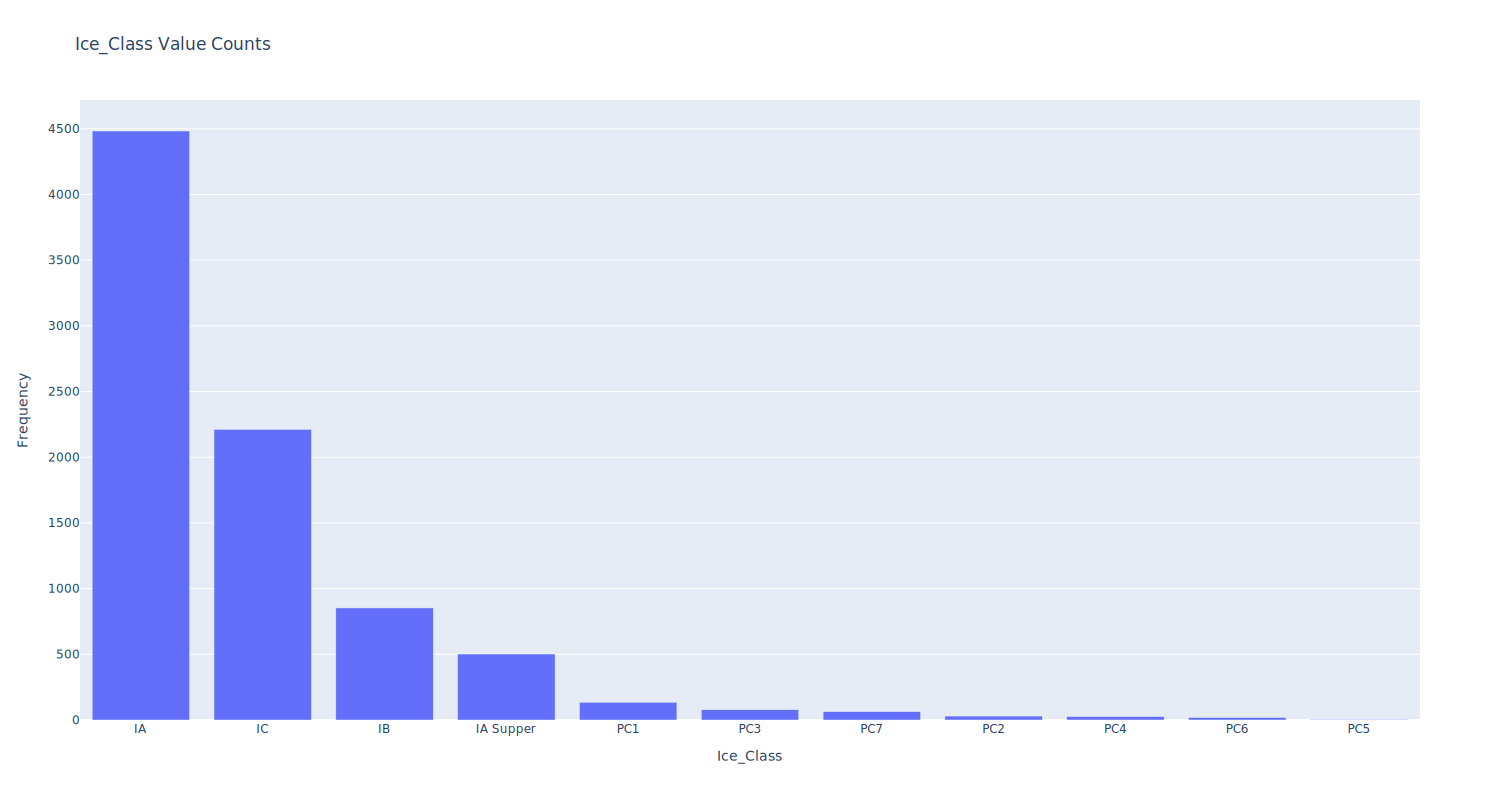

In [110]:
#@title Ice Class Value Counts


s = df[~pd.isnull(df['Ice_Class'])]['Ice_Class']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Ice_Class Value Counts'},
    'xaxis': {'title': {'text': 'Ice_Class'}},
    'yaxis': {'title': {'text': 'Frequency'}}
    
}  ))
figure.update_layout( autosize=False,height=800, width=1500)
figure.show()


* PC 1	Year-round operation in all polar waters
* PC 2	Year-round operation in moderate multi-year ice conditions
* PC 3	Year-round operation in second-year ice, which may include multi-year ice inclusions
* PC 4	Year-round operation in thick first-year ice, which may include old ice inclusions
* PC 5	Year-round operation in medium first-year ice, which may include old ice inclusions
* PC 6	Summer/autumn operation in medium first-year ice, which may include old ice inclusions
* PC 7	Summer/autumn operation in thin first-year ice, which may include old ice inclusions

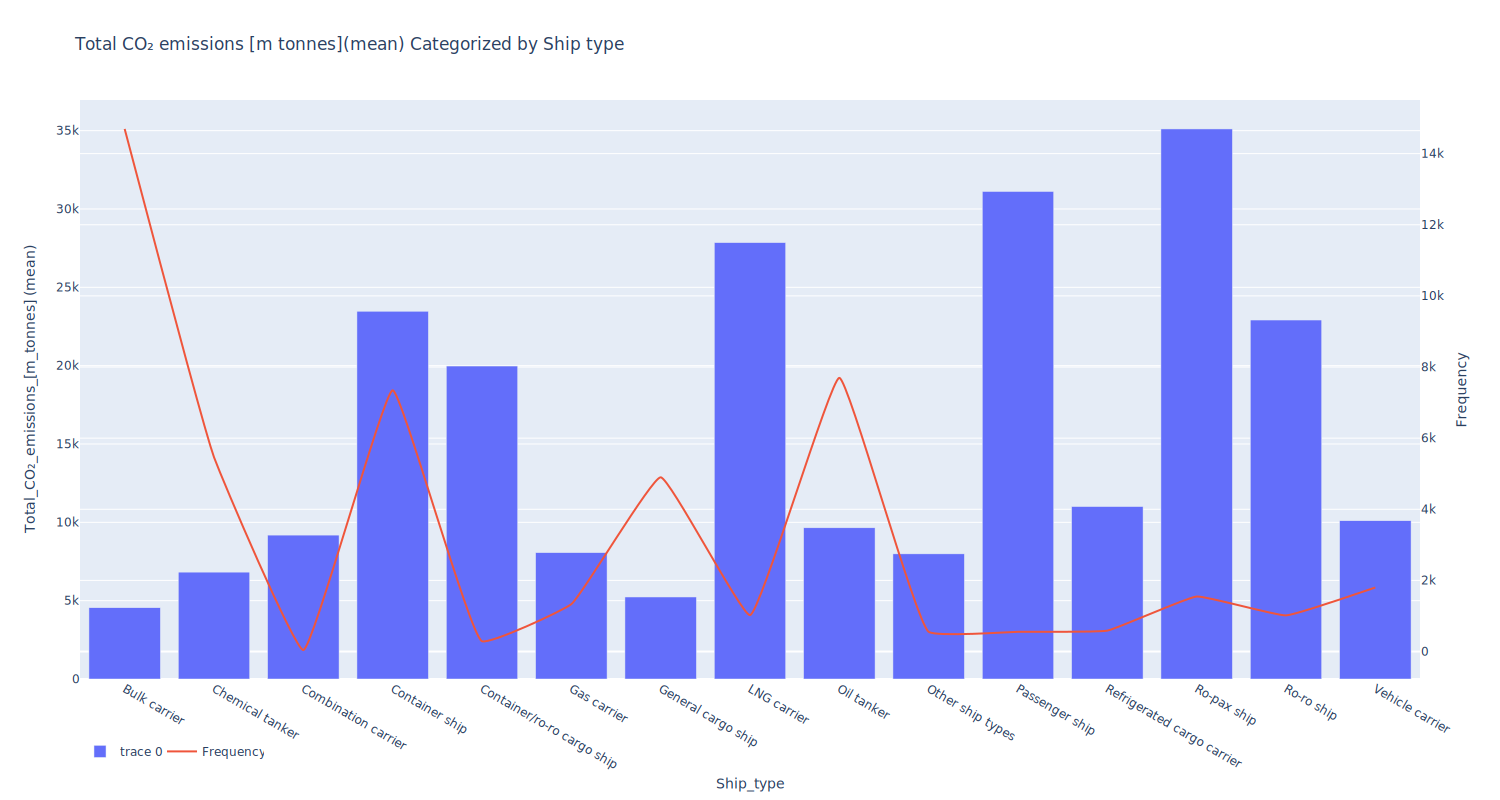

In [111]:
#@title Total CO₂ emissions (m tonnes)(mean) Categorized by Ship type


if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart = df.groupby('Ship_type')[['Total_CO₂_emissions_[m_tonnes]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure= go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Total CO₂ emissions [m tonnes](mean) Categorized by Ship type'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'side': 'left', 'title': {'text': 'Total_CO₂_emissions_[m_tonnes] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=800, width=1500)
figure.show()



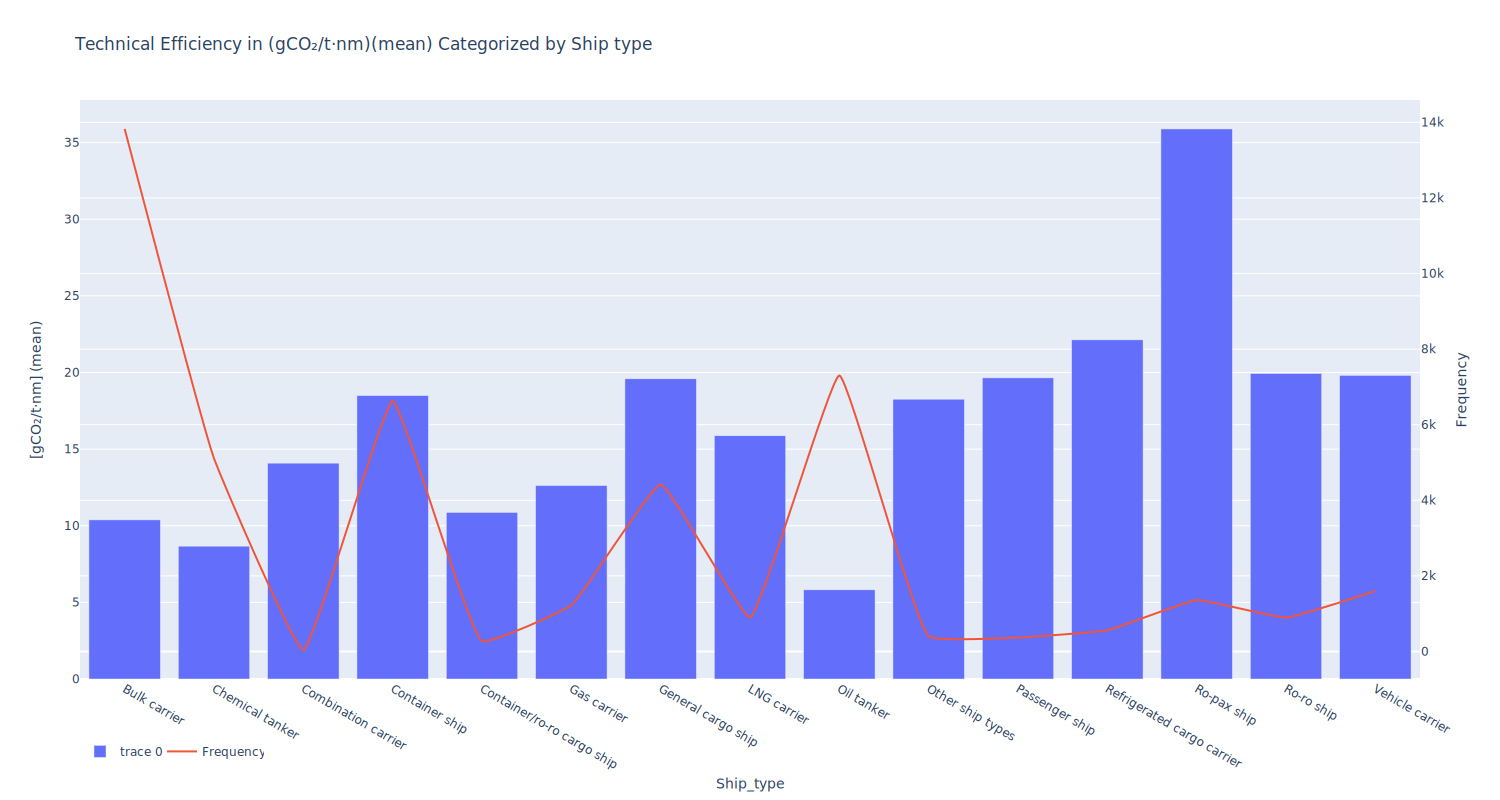

In [112]:
#@title Technical Efficiency in (gCO₂/t·nm)(mean) Categorized by Ship type

chart = df.groupby('Ship_type')[['[gCO₂/t·nm]']].agg(['count', 'mean'])
chart.columns = chart.columns.droplevel(0)
chart.columns = ["count", "data"]
chart.index.name = 'labels'
chart = chart.reset_index()
chart = chart[:100]
charts = [
	go.Bar(x=chart['labels'].values, y=chart['data'].values),
	go.Scatter(
		x=chart['labels'].values, y=chart['count'].values, yaxis='y2',
		name='Frequency', line={'shape': 'spline', 'smoothing': 0.3}, mode='lines'
	)
]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Technical Efficiency in (gCO₂/t·nm)(mean) Categorized by Ship type'},
    'xaxis': {'title': {'text': 'Ship_type'}},
    'yaxis': {'side': 'left', 'title': {'text': '[gCO₂/t·nm] (mean)'}},
    'yaxis2': {'overlaying': 'y', 'side': 'right', 'title': {'text': 'Frequency'}}
}))
figure.update_layout( autosize=False,height=800, width=1500)
figure.show()
